# Aprendizaje Supervisado 




In [1]:
### LIMPIEZA DE DATOS 
import numpy as np
import pandas as pd

###VISUALIZACION DEL MODELO

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

## .1 Modelos de aprendizaje no supervisado 

In [2]:
###DIVISION DE LOS DATOS----------------------------------------------- 

data= pd.read_csv("/home/inma/Master_Data_Science _Contenido/Machine_learningI/Practica/Machine-Learning-I/CSV/Seleccion_variables_RF.csv")


#Etiquetarlos datos en funcion de alto o bajo. 

mediana= 870000.0
data["precio_div"]= np.where(data["Price"]>=mediana, "1", "0" )#1 es caro Y 0 es barato 
#print(data.head(100))
data=data.replace(np.nan,"0")
print(data.groupby('precio_div').size())

precio_div
0    13381
1    13675
dtype: int64


In [3]:
# Hemos separado  el 70%

# dividir el data set de forma aleatoria 

p_train = 0.70 # Porcentaje de train.

data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, test = data[data['is_train']==True], data[data['is_train']==False]
df = data.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))


Ejemplos usados para entrenar:  18864
Ejemplos usados para test:  8192


### .1.1 GLM : Regresion Logística 

 hacer graficas 
  con y sin normalizar??


In [4]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
#TRAIN 
features = np.array(train[['Distance','Lattitude','Landsize','Bathroom']])
labels = np.array(train['precio_div'])

In [6]:
#TEST
features_t = np.array(test[['Distance','Lattitude','Landsize','Bathroom']])
labels_t = np.array(test['precio_div'])

In [7]:
# Create logistic regression model

model = linear_model.LogisticRegression()

#Train the model
model.fit(features, labels)#The first is a matrix of features, and the second is a matrix of class labels. 

LogisticRegression()

In [8]:
#Validacion del modelo

#predicion of the class
predictions_t= model.predict(features_t)
print(accuracy_score(labels_t, predictions_t))

0.7022705078125


In [9]:
#Reporte de resultados del Modelo

print(classification_report(labels_t , predictions_t))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      4041
           1       0.73      0.66      0.69      4151

    accuracy                           0.70      8192
   macro avg       0.70      0.70      0.70      8192
weighted avg       0.70      0.70      0.70      8192



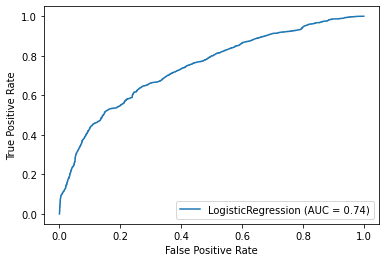

In [10]:
#dibujo de la Curva ROC

from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

rlog_disp = plot_roc_curve(model, features, labels)
plt.show()


### .1.2. K- NEAREST NEIGHBORS (KNN )



In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# # SELECCION DE VARIABLES

X = train[['Distance','Lattitude','Landsize','Bathroom']].values
y = train['precio_div'].values

X_test=test[['Distance','Lattitude','Landsize','Bathroom']].values
y_test=test['precio_div'].values
 

In [13]:
#NORMALIZACION
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

#scaler = MinMaxScaler()# cambiar poe standar scaler, robust scaler(coge el percentil 25 y el 75 )
#X= scaler.fit_transform(X)
#X_test = scaler.transform(X_test)

In [14]:

#ENTRENAR EL MODELO

#Hiperparametros-
n_neighbors = 3
#algorithm='brute'
#p=1
weights='distance'# uniforme ( todos los puntos son iguales )
#n_jobs=-1

classifier = KNeighborsClassifier(n_neighbors)

# #Train the classifier
classifier.fit(X,y)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(classifier.score(X, y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.83


In [15]:
#PRECISION DEL MODELO
pred = classifier.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[3312  729]
 [ 624 3527]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4041
           1       0.83      0.85      0.84      4151

    accuracy                           0.83      8192
   macro avg       0.84      0.83      0.83      8192
weighted avg       0.84      0.83      0.83      8192



([<matplotlib.axis.XTick at 0x7effd41c20a0>,
 <a list of 5 Text major ticklabel objects>)

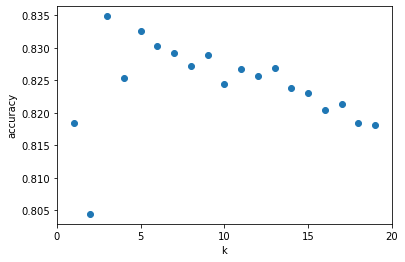

In [16]:
#ELEGIR EL MEJOR K 

k_range = range(1, 20)
scores = []
for k in k_range:
     knn = KNeighborsClassifier(n_neighbors = k)
     knn.fit(X, y)
     scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [28]:

#encontrar la mejor k 

best_k=0
best_score=0
neighbors=range(1,10,2)#considerara min_k=1, max_k=25, solo odd numbers 
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k) #instantiante classifier
    knn.fit(X, y )# fit model 
    knn_y_pred= knn.predict(X_test)
    
    #we will consider the optimal k to be the k that produce the highest f1 score
    f1 = metrics.f1_score(y_test, knn_y_pred, pos_label= 0)
    if f1> best_score:
        best_k= k 
        best_score =f1
        

#instantiate the classifier with the optimal k, fir the model and make predictions
knn=  KNeighborsClassifier(n_neighbors=best_k) 
knn.fit(X, y )
knn_y_pred= knn.predict(X_test)



/home/inma/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=0 is not a valid label: array(['0', '1'], dtype='<U1')

In [ ]:
#Pintar curva ROC
Knn_disp = plot_roc_curve(classifier, X, y)
plt.show()

### .1.3. SVM 


Primero sin normalizar y despues normalizando 
probar los difrentes kernels 

In [18]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [19]:
X = train[['Distance','Lattitude','Landsize','Bathroom']].values
y = train['precio_div'].values

X_test=test[['Distance','Lattitude','Landsize','Bathroom']].values
y_test=test['precio_div'].values

Kernel Lineal 

In [ ]:
#classifier = SVC(kernel = "linear", C = 2)
#classifier.fit(X, y) 
#print(classifier.predict(X_test))
#print("Kernel lineal", classifier.score(X_test, Y_test))

Kernel Polinómico

In [ ]:
#classifier = SVC(kernel = "poly",degree= 2, C = 2)
#classifier.fit(X, y) 
#print(classifier.predict(X_test))
#print("Kernel polinómico", classifier.score(X_test, Y_test))

Kernel RBF

In [21]:
classifier = SVC(kernel = "rbf", gamma = 0.3, C = 2)
classifier.fit(X, y) 
#print(classifier.predict(X_test))
print("Kernel rbf", classifier.score(X_test, y_test))

Kernel rbf 0.72021484375


Normalizando 

In [22]:
#NORMALIZACION

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

classifier = SVC(kernel = "rbf", gamma = 0.3, C = 2)
classifier.fit(X, y) 
#print(classifier.predict(X_test))
print(classifier.score(X_test, y_test))

0.7640380859375


In [26]:
from sklearn.model_selection import GridSearchCV

#define the hyperparameters we ant to tune 
param_grid={
            'kernel':['rbf'],
            'C':[0.001,0.01,0.1,1,10],
            'gamma': [0.001,0.01,0.1,1],
}

#instantiate GridSearchCV fit model, and male prediction

gs_svc=GridSearchCV(SVC(), param_grid=param_grid)
gs_svc.fit(X,y)
y_pred=gs_svc.predict(X_test)



KeyboardInterrupt: 

## 2. Evaluacion del punto de corte 

Para elegir el mejor punto de corte  para la categorizacion binaria del precio de las casas en caras y baratas vamos a utilzar la curva ROC. 


En el siguiente gráfico, Figura 1, se representa la curva ROC y el punto de
corte que maximiza el K-S, que se corresponde con el punto en la curva
ROC cuya distancia horizontal al eje es máxima 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

ax = plt.gca()
rlog_disp.plot(ax=ax, alpha=0.8)
Knn_disp.plot(ax=ax, alpha=0.8)
plt.show()